# Introduction to practical Pandas


Welcome to this short introduction to Pandas. We will be covering the essentials on how to use Pandas for small data processing and a bit of visualisation.

We obviously start with the imports. Seaborn is a library that produces nice looking graphs and which is made to work with Pandas.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Ignore those lines; they set properties for the data
# visualisation library.
sns.set_style("dark")
sns.set(rc={'figure.figsize':(10.80 * 0.95, 9.20 * 0.95)})

## First approach - opening files, slicing, index

We will work with the [Rossmann Store Dataset](https://www.kaggle.com/c/rossmann-store-sales) which contains the daily sales of about a thousand Rossmann stores in Germany, between 2013 and 2015.  

Let's start using Pandas by loading the data (stored as a CSV) into a *DataFrame*. The DataFrame is the main object you will be dealing with when working with Pandas. It is pretty much a table, with rows and columns to index the data. Let's have a look.  
For now, please ignore the *dtype* argument in the `read_csv` function. Also note that the `head` argument returns the first few rows of the DataFrame.

In [2]:
df = pd.read_csv('rossmann/sales.csv', dtype={'StateHoliday': str})
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


The first theme we will cover in this tutorial is how to get your way around the data. In other words: how do you select the data of interest? There are many ways to do so. Let's break it down piece by piece.

### 1. Column selection

A column usually represents a *variable* in the dataset. In this example, we can see that there are 9 columns: *Store*, *DayOfWeek*, *Customers* etc.  
To select a column in Pandas, the most intuitive way is to use this dict-like syntax:

In [3]:
# dict-like of syntax
df['Customers'].head()

0     555
1     625
2     821
3    1498
4     559
Name: Customers, dtype: int64

One can also use `df.Customers` which might less pythonic at first. And you may be right, I'd say it's more *pandorable* (a term I found in the great series [Effective Pandas](https://github.com/TomAugspurger/effective-pandas). We will see the reason for this later on when we will talk about method chaining.

In [4]:
# Other possibility:
df.Customers.head()

0     555
1     625
2     821
3    1498
4     559
Name: Customers, dtype: int64

Note that when we select a column, the output of the `df.Customers` operation is a *Series*, it's another class from Pandas which has distinct properties and functions compared to the *DataFrame* although quite similar in the syntax.  
One can select a subset of the original DataFrame by selecting several columns. For this, we can use the dict-like syntax, as if we had many keys:

In [5]:
df[['Date', 'Customers']].head()

,Date,Customers
0,2015-07-31,555
1,2015-07-31,625
2,2015-07-31,821
3,2015-07-31,1498
4,2015-07-31,559


The output is a DataFrame itself; but this time with only 2 columns.

### 2. Selecting rows - indexes

So far so good. Now, row selection is slightly more tedious. It's not complicated per se but that's where most of the confusion might come from if you are learning Pandas.  
You might think that a DataFrame is a list of rows and therefore we could use a list-like syntax to obtain, say, the 4th row:  

```df[4]```

But this would result in a `KeyError`.

Well, you are right to some extent. But it would be extremely limiting to think of a DataFrame as a list of rows. For this reason, a syntax such as `df[4]` doesn't work. But do we care about the ordering of the rows at all? Well, not necessarily.  
Imagine that you are given a dataset of transactions. For each row, you get 5 columns: the transaction ID, the item bought (or the item ID), the buyer (or buyer ID), the amount spent and the time when the transaction occured. Most of your work is based on transaction IDs. In other words, you are often given a transaction ID and you need to verify who the buyer was or what the amount spent was.  
Do we really care if the given transaction is recorded at the 10th or 186th row? No. Actually what really matters is the transaction ID. It is litteraly a proper key to identify the transaction.  
Pandas integrates natively such concept as an *index*. When the dataframe is displayed in the notebook, the index is shown as a special column on the left-hand side.

Let's see an example. We are going to load the same dataframe that we were using so far; with the exception that I pre-formatted it such that the *index* corresponds to a specific day (which is the `Date` column in the original dataframe).

In [6]:
other_df = pd.read_pickle('rossmann/sales_date_indexed.pkl')
other_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


Now, let's say we want to know what happened on the 14th of November 2014 (4 years ago!). We can use the `.loc` syntax. `.loc` is used to obtain rows based on the index. It should be the primary way to obtain a or many specific rows. 

In [7]:
other_df.loc['2014-11-14'].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2014-11-14,1,5,5334,603,1,1,0,0
2014-11-14,2,5,4655,560,1,1,0,0
2014-11-14,3,5,7836,778,1,1,0,0
2014-11-14,4,5,9790,1337,1,1,0,0
2014-11-14,5,5,5199,568,1,1,0,0


Interestingly, observe that a single index value (here: `'2014-11-14'`) can output several rows. This is not necessarily a desirable property. It all depends on what you wish to obtain with the data. As we will see, Pandas makes it easy to re-order and re-arrange the rows and columns in such a way that the dataframe gives a good representation of your problem.  
In this example, if we were to predict future values of the 'Sales' variable, a more desirable formatting of the dataframe would be based on a `(Store, Date)` pair. Pandas can actually handle this very well using multiindices but we won't cover this in this tutorial.   
Formatting a dataframe to fit a certain purpose is a dedicated task by itself. For more information, you can read [Tidy Data](http://vita.had.co.nz/papers/tidy-data.pdf).   

Now you might say: what if I'm genuinely interested in the 3rd row? Then you can use the `.iloc` syntax. This one is completely dissociated from the index of the DataFrame.

In [8]:
other_df.iloc[3]

Store                4
DayOfWeek            5
Sales            13995
Customers         1498
Open                 1
Promo                1
StateHoliday         0
SchoolHoliday        1
Name: 2015-07-31, dtype: object

Notice that we obtained a single row which index is *2015-07-31*.   
All in all, I strongly encourage the use of the `.loc` syntax, paired with a clever choice of index. Among the benefits:  
- `.loc` will give the expected output even if the dataframe has been shuffled.
- Merging external sources of data will be easier.
- It supports boolean queries.

## Boolean queries

In all of what we have done so far, we knew exactly what we wanted. Be it a specific date, a specific column or a specific row. Let's introduce *conditions*. What if I want the rows that correspond to a Friday?  
When a column is used with boolean operators (which return True or False), the result of the operation is a column of type `bool`:

In [9]:
(df.DayOfWeek == 5).head()

0    True
1    True
2    True
3    True
4    True
Name: DayOfWeek, dtype: bool

Observe that the index of this column corresponds to the index of the original dataframe. In this case, since we didn't define a specific index for `df`, it is by default just a list of integers. In any case, the result of this operation is a column where the rows equal `True` when DayOfWeek corresponds to a Friday and `False` otherwise. In other words, this column gives **for each index, if the corresponding row is a Friday or not**.  
But since the index is a row-identifier for a dataframe, we can use the previous result to select which row we want to preserve:

In [10]:
df.loc[df.DayOfWeek == 5].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Observe that we used `.loc` in conjonction with a boolean column **which index was shared with `df`**. In this process, `.loc` discards the rows which have a boolean value of False. We are then left which a subset of the original dataframes, in which every row corresponds to a Friday.

Obviously, we can combine several conditions. For instance, all the rows which correspond to a Friday with more than $10,000 in sales. Note the somewhat cumbersome syntax:  
- you do need a set of parenthesis around each condition
- you cannot use the usual `and`, `or` and `not` operators from Python. Instead, use `&`, `|` and `!` respectively (as done in other programming languages).

In [11]:
df.loc[(df.DayOfWeek == 5) & (df.Sales > 10_000)].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
3,4,5,2015-07-31,13995,1498,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
10,11,5,2015-07-31,10457,1236,1,1,0,1
15,16,5,2015-07-31,10231,979,1,1,0,1
17,18,5,2015-07-31,10071,936,1,1,0,1


To avoid this, Pandas provides a `query` method for which I have a bit of a love-hate relationship. The good thing is that it provides a way to write conditions that are more pythonic (without parenthesis and with keywords). The bad thing is that you need to encapsulate this code in a string:

In [12]:
df.query('DayOfWeek == 5 and Sales > 10_000').head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
3,4,5,2015-07-31,13995,1498,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
10,11,5,2015-07-31,10457,1236,1,1,0,1
15,16,5,2015-07-31,10231,979,1,1,0,1
17,18,5,2015-07-31,10071,936,1,1,0,1


I am not too familiar with what happens under-the-hood, but I assume Pandas uses a call to `exec` so you should keep this in mind. 

I think we made good progress since we started. We now know how to select a column or a subset of columns, how to select a row or many rows, based on their position in the dataframe or based on their index and how to obtain specific rows by formulating boolean queries. Heck, if we wanted, we could right now obtain all the entries that happened between a Tuesday and a Thursday, where there were more than 1,500 customers but less than 3,000 and which generated at least $7,500. Oh and let's say that want this is happen during school holidays.

In [13]:
df.query('2 <= DayOfWeek <= 4 and '
         '1_500 <= Customers <= 3_000 and '
         '7_500 <= Sales and ' 
         'SchoolHoliday == 1').head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1239,125,4,2015-07-30,13146,1580,1,1,0,1
1365,251,4,2015-07-30,20061,2377,1,1,0,1
1373,259,4,2015-07-30,12178,2477,1,1,0,1
1381,267,4,2015-07-30,14475,1697,1,1,0,1
1434,320,4,2015-07-30,16912,2071,1,1,0,1


## Chaining

There's an essential aspect of a *pandorable* code which is **chaining**. We will describe it through examples although it's easy to understand. Let's take the following example. We're making a query to obtain Fridays and sales greater than $10,000 as previsouly. The result is a dataframe. So we can select its column Store:

In [14]:
(df.query('DayOfWeek == 5 and Sales > 10_000').Store).head()

3      4
6      7
10    11
15    16
17    18
Name: Store, dtype: int64

We can even go further and reduce this column by obtaining its mean:

In [15]:
df.query('DayOfWeek == 5 and Sales > 10_000').Sales.mean()

12553.586294416244

In short, we:  
- selected the dataframe
- from this dataframe, made a boolean query to select specific rows. We obtained a new dataframe.
- from this dataframe, obtained the the column Sales. We obtained a Series.
- from this series, we computed the mean value.

All of this in just one line! Or should I say in one command. A pandorable way to write this is the following:

In [16]:
(df.query('DayOfWeek == 5 and Sales > 10_000')
   .Sales
   .mean())

12553.586294416244

That's method chaining. Why does it matter? First of all, Pandas is made to work well with this sort of chaining. The reason for this is that every method or function you will see in Pandas will never alter the dataframe under the hood. It will **always return** an altered version of the dataframe. Here's the non-chain way of computing the average sales that are greater than $10,000 and obtained on a Friday:

In [17]:
queried_df = df.query('DayOfWeek == 5 and Sales > 10_000')
sales_column_from_queried_df = queried_df.Sales
average_sales = sales_column_from_queried_df.mean()

print(average_sales)

12553.586294416244


What's more readable? By forcing us to have to name every intermediate variable along the way, there's a risk of making the code too verbose and harder to understand. Although this can be debated. It could be that someone who has never used Pandas finds the second snippet easier to understand, precisely because we named everything.

Another good side effect of using method chaining is that it limits the risk of undesired results. This one is slightly less obvious. But imagine for a second: a common (not recommended) way to manipulate dataframes is to successively alter it, line by line. Like:  

```df = df.query('Open == 1')
df['LotsOfCustomers'] = df.Customers > 5_000  # Creates a new boolean column
df.loc[5, 'date'] = '2018-11-14'  # Changes the 'date' value of the row with index 5
df = df.loc[df.Store == 12]```

In this example, we took a subset of the dataframe, created a new column, modified a value and took a subset again. Let's say that we are creating a pipeline that includes all those steps. We proceed by creating many more Jupyter cells with more processing steps like this. What happens if at some point I decide to go back a few cells and execute this code again? The `df` dataframe will have completely changed and we have no guarantee that the column `Open` or `Date` still exists. Or that there is a store with id `12`.   
By splitting our pipeline in several steps, we included a risk based on the fact that at each line we expect `df` to have specific characteristics. Conversely, if we create a pipeline using method chaining from loading the data to end results, there's no such risk since everything is achieved in just one command.  
However note that this reason of prefering method chaining is quite specific to notebooks where code doesn't follow a specific order (contrary to a script). So I think chaining is less important in scripts although it still makes the code slightly cleaner.


## Cleaning

Alright, now, plot twist: in the next few examples, I will NOT be using method chaining. But this is only for education purposes. As it turns out, method chaining hides the action of each step. Here I precisely want to show you what all the methods do. So we won't use method chaining for now. We will run a few commands and at the end we will gather everything in a single-command, chained pipeline.

An important part of dealing with dataframes is cleaning. There are many things 'cleaning' implies so we will focus on a few aspects:  
- renaming columns
- renaming some categorical variables
- setting a proper dtype to columns

At the end of the process, we want to have a tidy dataframe where each column has an acceptable name with a known dtype. Let's see how to do it.

### Renaming columns

I'm almost ashamed to make a section for this but believe it or not, there's a `rename` function. You have to specify if you want to rename rows or columns and then pass a dictionnary of the form `{old_name: new_name}`. Like so:

In [18]:
(df.rename(columns={'Customers': 'customers',
                    'Sales': 'sales'})
   .head())

,Store,DayOfWeek,Date,sales,customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Note that the name of some of the columns have changed. Now, something which is perhaps more unknown is that you can pass a callable to `rename`. This callable will be applied to each column name. Let's make a function that converts CamelCase to snake_case and use to rename the columns of the dataframe.

In [19]:
def camel_to_snake(camel_x):
    """Converts CamelCase (e.g. DayOfWeek) to snake_case (e.g.: day_of_week)"""
    snake_x = []
    for i, char in enumerate(camel_x):
        if char.isupper() and i != 0:
            snake_x.append('_')
        snake_x.append(char.lower())
        
    return ''.join(snake_x)

df = df.rename(columns=camel_to_snake)
df = df.rename(columns={'store': 'store_id'})
df.head()

,store_id,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


My pythonic mind is much more comfortable now. All those uppercase letters, urgh. :-)   
It's already slightly better. Now let's enforce a dtype to all the columns. There are several reasons why we might want to do this:  
- we limit the number of bad surprises (for instance, if by default Pandas thinks that `transaction_id` is an int, it will let you do arithmetics on it. No thanks, let's avoid that.
- we can use better storing systems than CSV (for instance: Pickle or Feather). This can compress the data based on the dtype (why use 64 bits when 16 bits is enough?).
- processing is potentially faster (Pandas doesn't have to try to cast the input).
- if you are doing machine learning, [scikit-learn](https://scikit-learn.org/stable/) is facilitating more and more the use of dataframes as input for its machine learning models. In this case, the difference between `1` (as an int) and `'1'` (as a string) is crucial.
- perhaps most importantly: we all like a tidy house, right? By defining the dtype of all the columns, we have more insurance that everyting is at the right place.

Now that we reviewed why you should want to cast your columns, let's cover a few possibilities:  
- numeric: float, int, etc. Pandas provides a handy function `pd.to_numeric` that can handle missing values (NaN) more gracefully. We will not be using it in this tutorial since we don't have missing data.
- bool
- strings
- datetime via the function `pd.to_datetime`.
- categories: this one is slightly more abstract. It can be very convenient when using scikit-learn or any other machine learning library and can be very efficiency compressed (using a sparse representation). A column should be declared 'category' when there is a somewhat limited number of values that the variable can take. For instance, `day_of_the_week` can be thought as a categorical variable because there are only 7 values that it can take. On the contrary, if we had a table with millions of new transactions everyday, the `transaction_id` column woudln't be a great fit. Choosing whether or not one wants to use the 'category' dtype is up to her. Again, it's all problem-dependant. What should the dataframe represent?  

Let's convert a few columns. We will take care of the `date` column in a minute.

In [20]:
df = df.astype(dict(store_id='str',
                    day_of_week='category',
                    sales=np.float32,
                    customers=np.float32,
                    open='category',
                    promo='category',
                    state_holiday='category',
                    school_holiday='category'))
df.head()

,store_id,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday
0,1,5,2015-07-31,5263.0,555.0,1,1,0,1
1,2,5,2015-07-31,6064.0,625.0,1,1,0,1
2,3,5,2015-07-31,8314.0,821.0,1,1,0,1
3,4,5,2015-07-31,13995.0,1498.0,1,1,0,1
4,5,5,2015-07-31,4822.0,559.0,1,1,0,1


It seems like nothing happened by actually, if you select a column, you can now have more information. Notice that Pandas acknowledges that `day_of_week` is a category and that it holds 7 unique int64 values: 1, 2, 3, 4, 5, 6, 7.   
Also take note that a *category* is not a dtype by itself. It's a layer on top of a dtype to indicate that the column has a restricted number of non-ordered values. In this sense, we would probably have been better off first declaring `day_of_week` as a uint8 and then as a category.

In [21]:
df.day_of_week.head()

0    5
1    5
2    5
3    5
4    5
Name: day_of_week, dtype: category
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

### Applying a function on values of a dataframe

This one is obviously quite important. Let's say that we want to convert the `day_of_week` column, represented with a int, by plain-english words?  
One way would be to iterate over the rows of the dataframe and modify the values one by one. That is the obvious thing to do but extremely non-pandorable! First of all, a `for` loop can't really be integrated into a chained pipeline (although it can as we will see later), but it's also inefficient because this implies that you will retrieve each row at least twice:  
- once thanks to the `for` loop
- once to set the new value  

Instead, Pandas provides the `apply` method which can be integrated into a pipeline and works for dataframes and series:

In [22]:
day_of_week_id2name = {
    1: 'monday',
    2: 'tuesday',
    3: 'wednesday',
    4: 'thursday',
    5: 'friday',
    6: 'saturday',
    7: 'sunday'}

(df.day_of_week
   .apply(lambda x: day_of_week_id2name[x])
   .head())

0    friday
1    friday
2    friday
3    friday
4    friday
Name: day_of_week, dtype: category
Categories (7, object): [monday, tuesday, wednesday, thursday, friday, saturday, sunday]

In the lambda function, the values of `x` corresponds to the successive values of the `day_of_week` column.  
So we managed to convert this id-based `day_of_week` to a english word-based `day_of_week`. But we haven't **changed** the values of `day_of_week` in the original dataset. How can we do that? In the following cells, I'll use a temporary dataframe to avoid altering our original `df`.  

A first way is to literally **replace** the `day_of_week` column by the one we obtained previously:

In [23]:
temp_df = df.copy()
temp_df.day_of_week = (temp_df.day_of_week
                              .apply(lambda id: day_of_week_id2name[id]))
temp_df.head()

,store_id,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday
0,1,friday,2015-07-31,5263.0,555.0,1,1,0,1
1,2,friday,2015-07-31,6064.0,625.0,1,1,0,1
2,3,friday,2015-07-31,8314.0,821.0,1,1,0,1
3,4,friday,2015-07-31,13995.0,1498.0,1,1,0,1
4,5,friday,2015-07-31,4822.0,559.0,1,1,0,1


This approach has a major drawback: it can't be chained (because of the equal sign). Another annoying thing is that we have to write `temp_df.day_of_week` twice. Duh.   
Pandas provides a way to encapsulate this operation in a pipeline: the `assign` method. Its 'signature' could be the following: `assign(col_name=callable)` where `col_name` is the new column to be created (or replaced) and `callable` is a function which takes at least one argument: the dataframe itself.  
Let's see how we can use `assign` to achieve our conversion:

In [24]:
temp_df = (df.copy()
             .assign(day_of_week=lambda x: x.day_of_week
                                            .apply(lambda id: day_of_week_id2name[id])))
temp_df.head()

,store_id,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday
0,1,friday,2015-07-31,5263.0,555.0,1,1,0,1
1,2,friday,2015-07-31,6064.0,625.0,1,1,0,1
2,3,friday,2015-07-31,8314.0,821.0,1,1,0,1
3,4,friday,2015-07-31,13995.0,1498.0,1,1,0,1
4,5,friday,2015-07-31,4822.0,559.0,1,1,0,1


OK. We managed to get our operation in a chained pipeline. But it's quite ugly. A double lambda call, a line that never ends,... By the way, note that in the first `lambda` function, the variable `x` designates the dataframe itself, while in the second `lambda`, it corresponds to the values of the `day_of_week` column. Yes, it's starting to get confusing. But that's actually what I was saying.  Are there any better ways to do this?  
And easy one is to abstract one the `lambda` functions in a dedicated, named function:

In [25]:
def fn_day_of_week_id2name(id):
    return day_of_week_id2name[id]

temp_df = (df.copy()
             .assign(day_of_week=lambda x: x.day_of_week
                                            .apply(fn_day_of_week_id2name)))
temp_df.head()

,store_id,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday
0,1,friday,2015-07-31,5263.0,555.0,1,1,0,1
1,2,friday,2015-07-31,6064.0,625.0,1,1,0,1
2,3,friday,2015-07-31,8314.0,821.0,1,1,0,1
3,4,friday,2015-07-31,13995.0,1498.0,1,1,0,1
4,5,friday,2015-07-31,4822.0,559.0,1,1,0,1


It's *better*. As far as I'm concerned, I think I'd be happy with it. But I'll show you another way as a pretext to introduce the `pipe` method.   
Let's say that you actually **need** to write a complicated function that can't be written using only Pandas methods. Or just like right now, you want to abstract some instructions to make the code cleaner. Then you can use the `pipe` method which is a sort of cheat in this case. `pipe` takes as input the dataframe and is supposed to return an altered dataframe. That's all. The altered dataframe can be anything you want!  
In our case, it enables us to use the instruction with the equal sign:

In [26]:
def transform_day_of_week_to_str(df):
    df = df.copy()
    df.day_of_week = (df.day_of_week.apply(fn_day_of_week_id2name)
                        .cat.reorder_categories(['monday', 'tuesday', 'wednesday',
                                                 'thursday', 'friday', 'saturday',
                                                 'sunday'], ordered=True))
    return df

temp_df = (df.copy()
             .pipe(transform_day_of_week_to_str))
temp_df.head()

,store_id,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday
0,1,friday,2015-07-31,5263.0,555.0,1,1,0,1
1,2,friday,2015-07-31,6064.0,625.0,1,1,0,1
2,3,friday,2015-07-31,8314.0,821.0,1,1,0,1
3,4,friday,2015-07-31,13995.0,1498.0,1,1,0,1
4,5,friday,2015-07-31,4822.0,559.0,1,1,0,1


Pay special attention to the first line of our `transform_day_of_week_to_str` function: we use ```df = df.copy()```. This is simply because no matter what we do, we don't want to be modifying the original dataframe that was passed to the function. Remember that we said that Pandas never alters the dataframes under-the-hood? That is exactly the contract we are trying to follow here.

Let's finally apply this function on our dataframe (and not a copy) and let's move on.

In [27]:
df = df.pipe(transform_day_of_week_to_str)

A special case of `pipe` is when we pass extra arguments. Let's say that I don't like having zeroes and ones in the binary columns. Instead, I want to rename the columns (from `open` to `is_open`) and to convert the values to actual booleans. I can add the column on which I want to perform this operation as an extra argument to `pipe`:

In [28]:
def binary_to_boolean(df, column):
    df = df.copy()
    df[f'is_{column}'] = df[column].apply(lambda x: x == 1)
    df = df.drop(columns=column)
    df = df.astype({f'is_{column}': bool})
    return df

df = (df.pipe(binary_to_boolean, 'open')
        .pipe(binary_to_boolean, 'promo')
        .pipe(binary_to_boolean, 'state_holiday')
        .pipe(binary_to_boolean, 'school_holiday'))

df.head()

,store_id,day_of_week,date,sales,customers,is_open,is_promo,is_state_holiday,is_school_holiday
0,1,friday,2015-07-31,5263.0,555.0,True,True,False,True
1,2,friday,2015-07-31,6064.0,625.0,True,True,False,True
2,3,friday,2015-07-31,8314.0,821.0,True,True,False,True
3,4,friday,2015-07-31,13995.0,1498.0,True,True,False,True
4,5,friday,2015-07-31,4822.0,559.0,True,True,False,True


Let's appreciate this work: see how easy it becomes to read a query:

In [29]:
(df.query('is_school_holiday and 500 < sales < 1_000')
   .head())

,store_id,day_of_week,date,sales,customers,is_open,is_promo,is_state_holiday,is_school_holiday
129772,433,monday,2015-04-06,960.0,160.0,True,False,False,True
236537,198,wednesday,2014-12-31,972.0,142.0,True,False,False,True
237033,786,wednesday,2014-12-31,856.0,134.0,True,False,False,True
243578,786,wednesday,2014-12-24,908.0,138.0,True,False,False,True
371831,970,saturday,2014-08-09,876.0,114.0,True,False,False,True


The last step of our cleaning will be to define the `date` column as a datetime column. Having the `date` as a datetime object instead of a str if extremely useful: Pandas can derive for us lots of other useful columns (month, week of the year, day,...) and it provides other extremely handy functions of time series as we will see an example  later.

In [30]:
df = (df.assign(date=lambda df: pd.to_datetime(df.date,
                                               format='%Y-%m-%d')))

For instance, to extract the month of a given date:

In [31]:
(df.date
   .dt.month
   .head())

0    7
1    7
2    7
3    7
4    7
Name: date, dtype: int64

This formulation can be used in queries as well. Let's say that we want the Wednesdays of November where sales were above $10,000:

In [32]:
(df.query('date.dt.month == 11 and '
         'day_of_week == "wednesday" and '
         'sales > 10_000')
   .head())

,store_id,day_of_week,date,sales,customers,is_open,is_promo,is_state_holiday,is_school_holiday
269108,4,wednesday,2014-11-26,10083.0,1291.0,True,True,False,False
269111,7,wednesday,2014-11-26,10756.0,1002.0,True,True,False,False
269115,11,wednesday,2014-11-26,11103.0,1428.0,True,True,False,False
269116,12,wednesday,2014-11-26,10070.0,1107.0,True,True,False,False
269125,24,wednesday,2014-11-26,10490.0,913.0,True,True,False,False


## Final preprocessing pipeline

Beautiful! We have seen how rename and cast columns; how to create new columns or modify old ones by using an external function on the values of the columns. We also have had a glimpse of the power of timeseries with Pandas. Let's wrap this section up by providing a final pipeline: from start to finish.

In [33]:
df = (pd.read_csv('rossmann/sales.csv', dtype={'StateHoliday': 'str'})
        # Renaming columns.
        .rename(columns=camel_to_snake)
        .rename(columns={'store': 'store_id'})
        # Changing the dtype.
        .astype(dict(store_id='str',
                     day_of_week='category',
                     sales=np.float32,
                     customers=np.float32,
                     open='category',
                     promo='category',
                     state_holiday='category',
                     school_holiday='category'))
        # Changing from '1', '2', to 'monday', 'tuesday'
        .pipe(transform_day_of_week_to_str)
        # Forcing the conversion to bool and renaming the columns.
        .pipe(binary_to_boolean, 'open')
        .pipe(binary_to_boolean, 'promo')
        .pipe(binary_to_boolean, 'state_holiday')
        .pipe(binary_to_boolean, 'school_holiday')
        # datetime dtype on the `date` column.
        .assign(date=lambda df: pd.to_datetime(df.date,
                                               format='%Y-%m-%d')))

df.head()

,store_id,day_of_week,date,sales,customers,is_open,is_promo,is_state_holiday,is_school_holiday
0,1,friday,2015-07-31,5263.0,555.0,True,True,False,True
1,2,friday,2015-07-31,6064.0,625.0,True,True,False,True
2,3,friday,2015-07-31,8314.0,821.0,True,True,False,True
3,4,friday,2015-07-31,13995.0,1498.0,True,True,False,True
4,5,friday,2015-07-31,4822.0,559.0,True,True,False,True


## Data exploration with matplotlib and seaborn

This section is a bit of a bonus. But actually, cleaning and ordering the data is the the boring part and exploration is a fun one. Although as I said earlier, if you feel satisfaction of seing your house clean, you'll feel satisfaction of seeing your dataset clean. In which case data cleaning can also be enjoyable to some extent.  

We will now be using [seaborn](https://seaborn.pydata.org/index.html), a data visualisation library to be used in conjonction with Pandas. Here you will see that once the dataset is tidy, it becomes easier to obtain the desired graphs.   
Making meaningful, insightful and easy-to-read graphs is a job by itself and I have certainly no pretention in mastering this craft! So I'll just show you a few examples of what you can do by combining the power of pandas and seaborn. What follows is by no means a thorough or well-thought analysis of the data. Rather, it is a pretext to show use cases of pandas and seaborn.

First of all, is there a day of the week where most of sales occur? Or conversely, is there a day where sales occur less often?

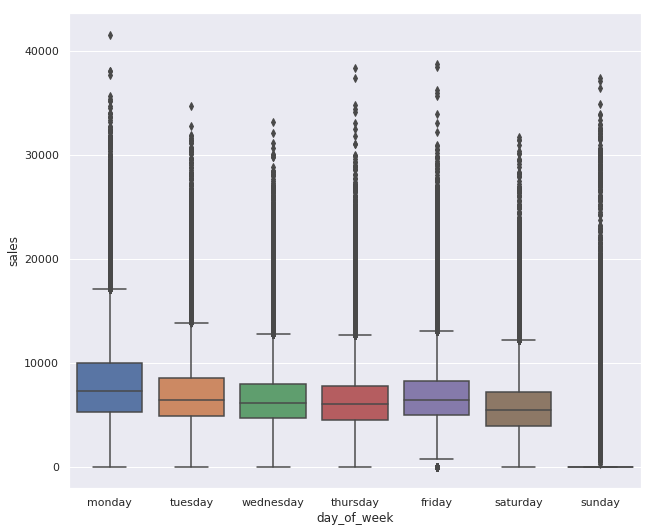

In [34]:
sns.set_style("dark")
sns.set(rc={'figure.figsize':(10.80 * 0.95, 9.20 * 0.95)})

sns.boxplot(x='day_of_week',
            y='sales',
            data=df)

The median is relatively stable across the days. Mondays seem to be the days with most variability. It could interesting to find a potential reason for this later. Note also the long tail of high percentiles which indicate that there are some special days where sales are exceptionally high (probably holidays ot special events). On the other hand, a somewhat non-negligeable part of sales are at zero. Finally, observe that the vast majority of sales spent on Sundays are null which some exceptions. We could think that it is because stores are closed a majority of Sundays with some exceptions. Let's see:

In [35]:
# Computing the number of times a store opened, per week day.
(df.groupby('day_of_week')
  .is_open
  .sum())

day_of_week
monday       137560.0
tuesday      143961.0
wednesday    141936.0
thursday     134644.0
friday       138640.0
saturday     144058.0
sunday         3593.0
Name: is_open, dtype: float64

As it turns out, stores opened on a Monday-Saturday approximately 40 times more often than on Sundays! Regarding the days where nothing was sold, let's try to understand what happened.

In [36]:
np.random.seed(0)
(df.query('sales == 0 and '
          'day_of_week != "sunday"')
    .sample(5))

,store_id,day_of_week,date,sales,customers,is_open,is_promo,is_state_holiday,is_school_holiday
64140,586,thursday,2015-06-04,0.0,0.0,False,True,False,False
129600,261,monday,2015-04-06,0.0,0.0,False,False,False,True
75776,1072,monday,2015-05-25,0.0,0.0,False,False,False,False
617363,439,wednesday,2013-12-25,0.0,0.0,False,False,False,True
75713,1009,monday,2015-05-25,0.0,0.0,False,False,False,False


As we could have predict, this corresponds to the days where the stores were closed. Probably for bank holidays for instance. In this small sample that we took, we can see one Christmas day and two 25th of May. A quick Google search shows that it corresponds to Whit Monday (7th Monday after Easter).

Days where there are no sales are boring. So we'll try ignore them in the future. Let's see if there's a correlation between number of customers and sales (which we expect!)

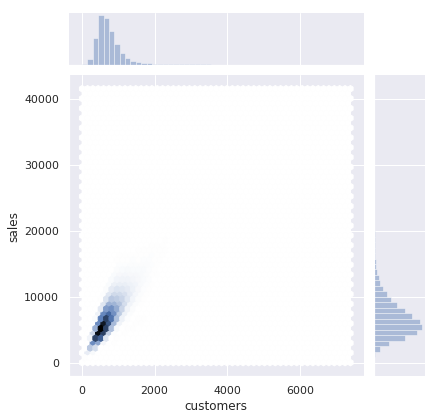

In [37]:
sns.jointplot(x='customers',
              y='sales',
              data=df.query('sales > 0 and customers > 0'),
              kind='hex')

It seems there's almost a linear law linking the sales and the number of customers if we ignore the long tail of exceptional sales. This is somewhat intuitive. We could run a linear regression on this data and get the R score. Although this wouldn't have much interest in practice. All this says is that one can potentially increase her sales by bringing more people to the store. Massive discovery!   
If we wanted to do predictive modelling, using the `customers` variable is risky because we don't have it in practice. Although it can potentially be easier to predict the number of customers who come to a store and the sales themselves.

Now, let's try to understand the long tail of sales we observed in the previous plot. When does it happen? We will now use a few functions of Pandas we haven't used so far.   
First: `set_index` converts one column of the dataframe to be **the** index of the dataframe. If you don't remember what indexes are, it might be a good idea to go up a few cells and have another read. In a nutshell, it's what determines what the `.loc` method will be based on. It also puts an important assertion on the use we will have of the dataset. In the following example, we will set the date to be the index; which means that observation in the dataframe is based on a time index. It's not about week_of_day anymore, or store_id, but by date!  
Later, we use `reset_index` to cancel the action of `set_index`. This is required by seaborn which plots *columns* and not indexes. I wish I could have kept the index as is though!  
The other important function is `resample`. `resample` assumes that we are working with time series. It is an extremely convenient function! Let's say that I want to plot the average sales on a weekly basis. Or a daily basis. Or 3 days basis. Or 2 months basis. We could manage to do that all by ourselves but it could be a bit cumbersome. `resample` groups the data for us. We follow by an operation to get the average sales **per week** and we plot the result.

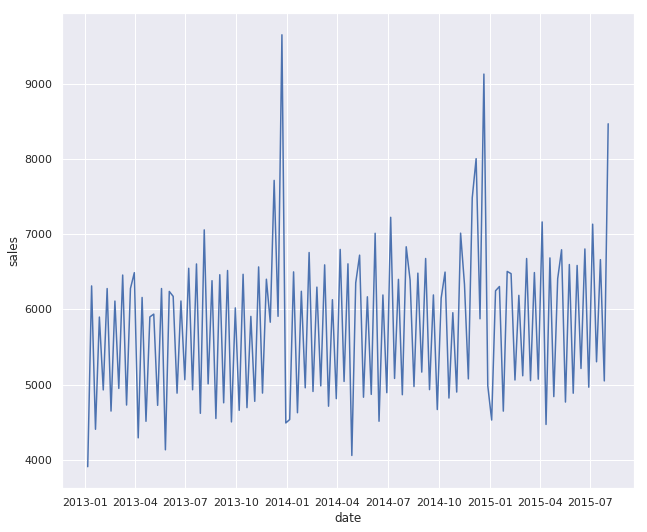

In [38]:
sns.lineplot(x='date',
             y='sales',
             data=df.set_index('date')
                    .resample('W')
                    .mean()  # Computes the weekly average of every column in the df.
                    .reset_index())

Interestingly, we observe peaks of sales around December each year. I wonder what's happening here... This type of observation, called *seasonalities* is common when studying time series. It could also be interesting to check if those stores have an equivalent of a Black Friday but I'll leave this as an exercise.

In [39]:
# Add more stuff regarding time series (using better aggregate than just the mean.)

So far we focused on broad view of what happened on average in every store. We saw that there were seasonality trends and that if we were to build a predictive model, we should incorporate them somehow.  
I'm now formulating an hypothesis: there is some *outlier* stores. Or in other words, I assume that there are stores which have a very distinct number of sales on average (either very low or very high). Let's verify this by plotting the sales vs the number of customers, as we have done before. But this time, let's have a look at the whole picture.   
I am grouping based on every store and plotting the average sales and average customers in each.

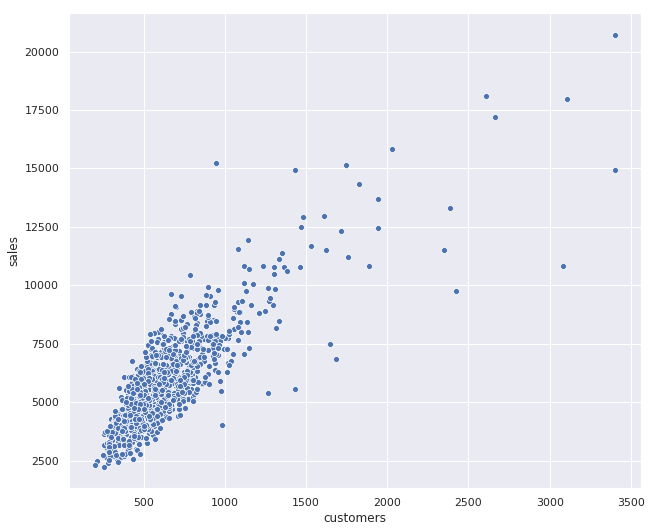

In [40]:
sns.scatterplot(x='customers',
                y='sales',
                data=df.groupby('store_id')
                       .mean())

We observe a bunch of stores that we will call 'normal' which follow a somewhat linear relationship between number of customers and number of sales as we saw before. These are stores with daily sales between $2,500 and $8,000 and daily number of customers between 250 and 1,000.  All the others seem to follow a slightly different law.  
Why is there such a difference in the 'normal' stores and the 'outlier' stores? Where does the difference come from? We could formulate some hypothesis, such as:  
- sales are, on average throughout the year, significatively higher in outlier stores than in normal stores
- the effect of seasonality in outlier stores is much more noticeable than in normal stores.  

In the following, we will index based on the `store_id`. This makes sense since we are conducting an analysis based on each individual store (see again how the definition of the dataframe changes based on our needs). We will obtain the store ID of both a normal store and outlier store and we will plot their weekly sales.

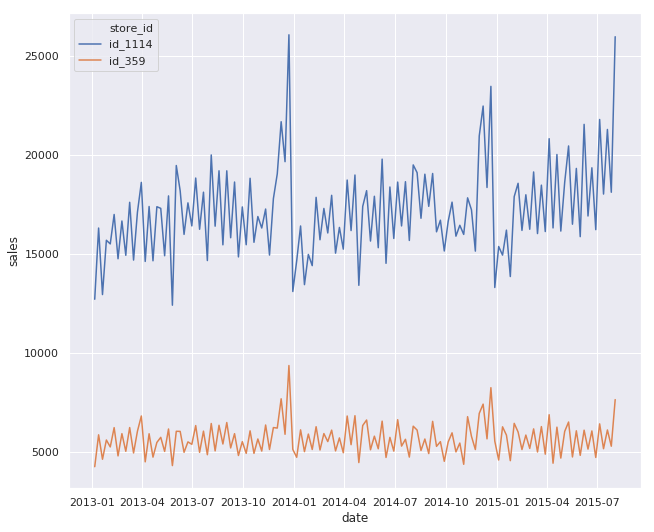

In [41]:
np.random.seed(0)
store_id_standard = (df.groupby('store_id')
                       .mean()
                       .query('500 <= customers <= 750 and 5_000 <= sales <= 7_000')
                       .sample()
                       .index[0])

store_id_outlier = (df.groupby('store_id')
                      .mean()
                      .query('1_500 <= customers and 10_000 <= sales')
                      .sample()
                      .index[0])

sns.lineplot(x='date',
             y='sales',
             hue='store_id',
             data=df.set_index('store_id')
                    .loc[[store_id_standard, store_id_outlier]]
                    .reset_index()
                    # Currently, seaborn has a bug where it tries to convert
                    # the 'hue' color value to int. In this case, it will
                    # be successful but undesired. So we harden the string 'store_id'.
                    .assign(store_id=lambda df: 'id_' + df.store_id)
                    .groupby('store_id')
                    .resample('W', on='date')
                    .mean()
                    .reset_index())

Based on only 2 stores, it looks like both of our hypothese apply: it's a mixture of overall better sales but the seasonality of the outlier store also appears to be more significant. Further analysis could determine by how much Christmas sales diverge from normal sales. And if this divergence is linked to the average level of sales during the year (e.g: the higher the average sales, the bigger the divergence).  

Can we confirm this observation on a more global scale? Why should we restrict ourselves to the analysis on only two stores anyways? Let's take the aggregate of all the inlier and outlier stores and let's plot their corresponding sales-over-time curve.

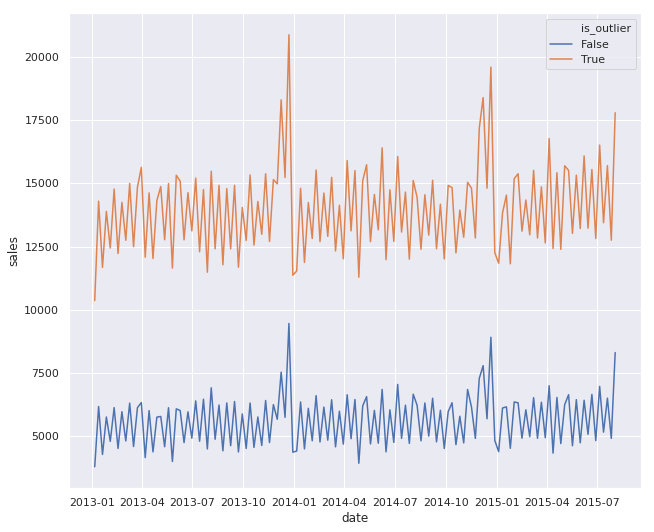

In [46]:
def fn_is_outlier(df):
    """Returns a boolean column, indexed based on store_id, where the value
    equals True when the store is an outlier, and False otherwise.
    
    A store is defined to be an outlier if the following conditions are followed:
      - its average sales are greater or equal $10,000.
      - its average customers are greater or equal 1,500.
      
    Note: this function is made to be used with `assign`. We expect the dataframe
    to be indexed based on store_id.
    """
    return (df.groupby('store_id')
              .mean()
              .assign(is_outlier=lambda df: (df.sales >= 10_000) & (df.customers >= 1_500))
              .astype({'is_outlier': 'category'})
              .is_outlier)
    
sns.lineplot(x='date',
             y='sales',
             hue='is_outlier',
             data=df.set_index('store_id')
                    .assign(is_outlier=fn_is_outlier)
                    .reset_index()
                    .groupby('is_outlier')
                    .resample('W', on='date')
                    .mean()
                    .reset_index())

The behavior of the two specific stores (id 1114 and 359) was actually fairly representative of the average behavior, or so it seems when looking at the overall trend.  

Now going back to an idea we described earlier: can we try to remove the 'offset' of the two time series? In other words, we would like to remove the average of both the inlier curve and outlier curve such that they will be both centered around zero. This way it will be easier to analyse the divergence from the mean. What we hypothesized ealier is that the effect of seasonality is more intense for *outlier* stores.

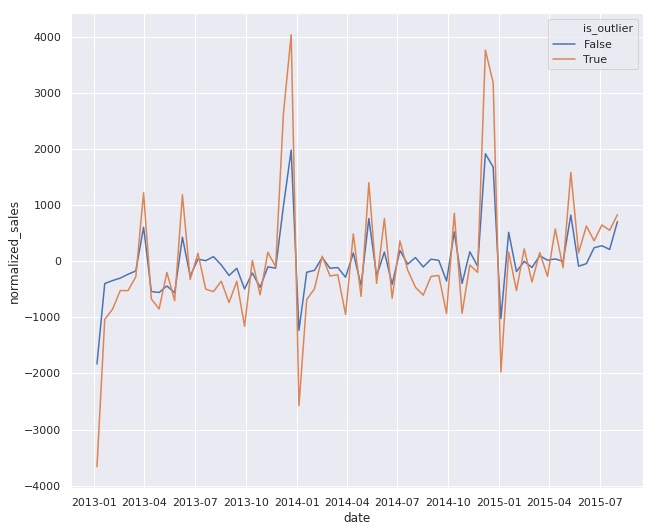

In [54]:
def compute_normalized_sales(grouped, resample_window='W'):
    average_sales = grouped.sales.mean()
    return (grouped.resample(resample_window, on='date')
                   .mean()
                   .reset_index()
                   .set_index(['is_outlier', 'date'])
                   .assign(normalized_sales=lambda df: df.sales - average_sales))
    
sns.lineplot(x='date',
             y='normalized_sales',
             hue='is_outlier',
             data=df.set_index('store_id')
                    .assign(is_outlier=fn_is_outlier)
                    .reset_index()
                    .groupby('is_outlier')
                    .pipe(compute_normalized_sales, resample_window='2W')
                    .reset_index())

Our hypothesis seems to be confirmed: outlier stores experience both greater sales during high-peak season compared to inlier stores, byu also experience lower sales in off-peak times. 

We will now be using another dataset provided for the Rossmann Sales prediction challenge. This dataset is store-focused. It gives, for every store, a bunch of useful information regarding the store. Let's preprocessing it a pipeline.

In [55]:
def to_numeric(df, column_name):
    df = df.copy()
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df

df_stores = (pd.read_csv('rossmann/stores.csv')
               .rename(columns=camel_to_snake)
               .rename(columns={'store': 'store_id'})
               .astype(dict(store_id=str,
                            store_type='category',
                            assortment='category',
                            competition_open_since_month='category',
                            promo2='bool'))
               .pipe(to_numeric, 'competition_distance')
               .pipe(to_numeric, 'competition_open_since_year')
               .pipe(to_numeric, 'promo2_since_week')
               .pipe(to_numeric, 'promo2_since_year')
               .drop(columns='promo_interval'))
df_stores.head(10)

,store_id,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year
0,1,c,a,1270.0,9.0,2008.0,False,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,True,13.0,2010.0
2,3,a,a,14130.0,12.0,2006.0,True,14.0,2011.0
3,4,c,c,620.0,9.0,2009.0,False,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,False,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,False,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,False,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,False,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,False,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,False,NaN,NaN


We will now be using extensively the `concat` function from Pandas. This function can merge two dataframes together (either on top of each other; thus adding rows) or side to each other (thus adding columns). In our case, we'd like to combine both the sales information from the first dataframe with the store-specific information from the second dataframe.  
Note that to successfully (and painlessly) merge two dataframes, you should always make sure they're indexed on the same object (apples with appels, towels with towels). In our case, we will always index based on the `store_id`, since we're making an analysis on stores. Also, you should always specific the type of merge you want to do (either adding rows, in which case you'd use `axis=0`; or adding columns, in which case you'd use `axis=1`).  

Let's explore the `store_type` column from the second dataframe.

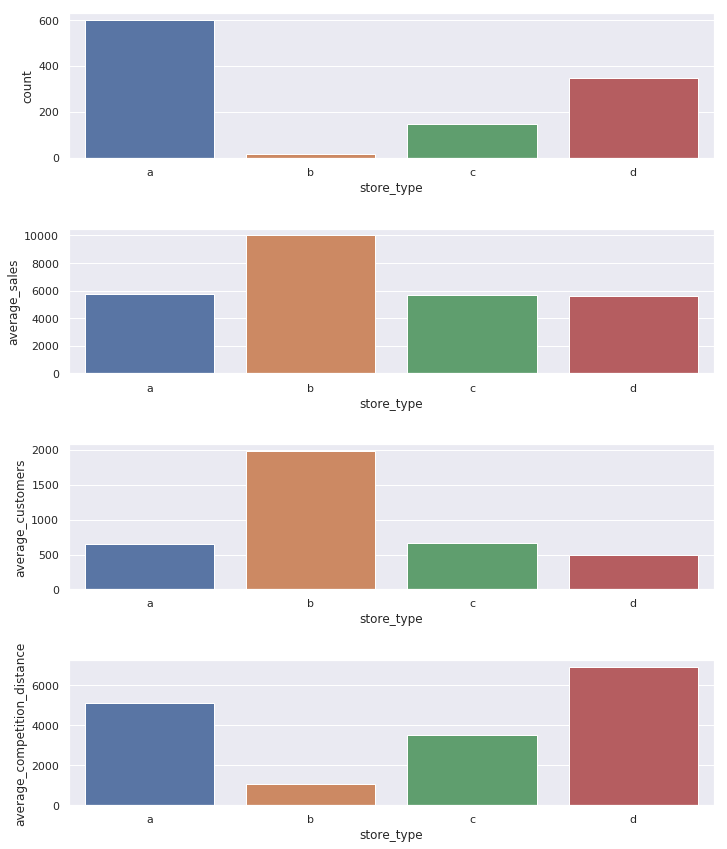

In [61]:
fig, axs = plt.subplots(4, 1, figsize=(10.80 * 0.95, 9.20 * 1.3))

# Plotting the number of stores per 'store_type'.
sns.barplot(x='store_type',
            y='count',
            data=df_stores.groupby('store_type')
                          .count()
                          .iloc[:, 0]
                          .rename('count')
                          .reset_index(),
           ax=axs[0])

# Plotting the average sale per 'store_type'.
sns.barplot(x='store_type',
            y='average_sales',
            data=pd.concat([df.groupby('store_id')
                              .mean()
                              .loc[:, ['sales']],
                            df_stores.set_index('store_id')
                                     .loc[:, ['store_type']]],
                            axis=1)
                   .groupby('store_type')
                   .mean()
                   .assign(average_sales=lambda df: df.sales)
                   .reset_index(),
           ax=axs[1])

# Plotting the average number of customers per 'store_type'.
sns.barplot(x='store_type',
            y='average_customers',
            data=pd.concat([df.groupby('store_id')
                              .mean()
                              .loc[:, ['customers']],
                            df_stores.set_index('store_id')
                                     .loc[:, ['store_type']]],
                            axis=1)
                   .groupby('store_type')
                   .mean()
                   .assign(average_customers=lambda df: df.customers)
                   .reset_index(),
           ax=axs[2])

# Plotting the average competition distance per 'store_type'.
sns.barplot(x='store_type',
            y='average_competition_distance',
            data=df_stores.groupby('store_type')
                          .mean()
                          .assign(average_competition_distance= lambda df: df.competition_distance)
                          .reset_index(),
           ax=axs[3])

plt.tight_layout()

The `store_type` column is definitively interesting.  
- Stores of type `a` are the most common. They yield average sales and are in general relatively far away from competitor stores. We could think that these stores are small and spread in cities (in the UK, Sainsbury's Local and Tesco Express are examples of what I have in mind).
- Stores of type `b` are pretty rare but interestingly they yield the most sales and are the most crowded. They are in general pretty close from the competition. This could potentially be superstores in industrial areas where a number of stores gather.
- Stores of type `c` and `d` are fairly similar. They yield the same amount of money and receive a comparable amount of customers on a daily basis. The only fair difference is that stores of type `d` are more common and more isolated. It could be interesting to run a time series analysis on stores `c` and `d`. Maybe they have a difference profile in time?   

Now we take again our sales vs customers plot, but this time we color each point based on the `store_type` column. We expect to see most of the outliers stores that we defined earlier to be of type `b` (high attendance, high sales, small number of them).

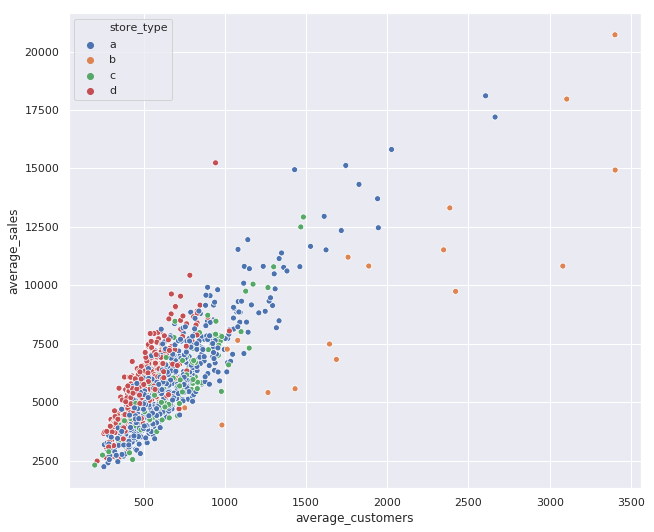

In [50]:
ax = sns.scatterplot(x='average_customers',
                y='average_sales',
                hue='store_type',
                data=pd.concat([df.groupby('store_id')
                                  .mean()
                                  .rename(columns={'customers': 'average_customers',
                                                   'sales': 'average_sales'})
                                  .loc[:, ['average_customers', 'average_sales']],
                                df_stores.set_index('store_id')
                                         .loc[:, ['store_type']]],
                              axis=1)
                        .reset_index())

Our hypothesis was true to some extent but not entirely. Actually it appears that stores of type `b`, although outliers, are also *bad sales outliers* because the ratio sales/customers is low. On the contrary, stores of type `d` are probably the most profitable: they have a high sales/customers ratio.  
As an exercise, the reader could plot a bar plot giving the average sales/customers ratio for each store category.

# Further reading

- [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) (O'Reilly) by Wes McKinney (Pandas' main author).
- The series of [Modern Pandas](https://tomaugspurger.github.io/modern-1-intro.html) blog post by Tom Augspurger.
- Any talk on Pandas at PyData (available on Youtube); (Marc Garcia, Jeff Reback,...)